# Linear Regression using SciKit Learn

Date Created: 28/03/2017
Author: Nilesh Chaturvedi

This is my first .pynb and this code is for regression.



In [21]:
#import necessary libraries
from sklearn import linear_model
from sklearn.preprocessing import normalize, PolynomialFeatures
import matplotlib.pyplot as plt
import csv
import numpy

In [22]:
#Load Data
def load_data(filename):
    
    file_data = csv.reader(open(filename, "r"), delimiter = ",")
    training_data = []
    testing_data = []
    for training_example in list(file_data)[2:]:
        if training_example[5]!="NaN":
            training_data.append([float(feature) for feature in training_example[:6]])
        else:
            testing_data.append([float(feature) for feature in training_example[:5]])
            
    return numpy.array(training_data), numpy.array(testing_data) 

In [23]:
def linear_regression_model(training):
    
    # Extract the features from training data.
    training_x = training[:,:5]
    
    # Extract values corresponding to every training example.
    training_y = (training[:,5])[:,numpy.newaxis]
    
    
    #normalize the data
    normalized_x = normalize(training_x, norm='l1', axis=0)
    normalized_y = normalize(training_y, norm='l1', axis=0)
    
    #Fit a linear model to the training data.
    linear = linear_model.LinearRegression()
    linear.fit(normalized_x, normalized_y)
    
    return linear

[ 0.25179856  0.09090909  0.07078233  0.12459372  0.13651425] : [-0.13459339]


[ 0.16546763  0.18181818  0.18626929  0.1787649   0.18299094] : [-0.19571013]


[ 0.15827338  0.18181818  0.18680149  0.16576381  0.17821957] : [-0.18943057]


[ 0.15107914  0.18181818  0.20383183  0.18959913  0.18405125] : [-0.19447187]


[ 0.15827338  0.18181818  0.19159127  0.18959913  0.17009057] : [-0.1891593]


[ 0.11510791  0.18181818  0.16072379  0.15167931  0.14813342] : [-0.17128582]


Linear Model Statistics 

Weights : [[-0.05838197 -0.54523478  0.19860675 -0.22796095 -0.58475952]] 
Bias : [ 0.02384656]


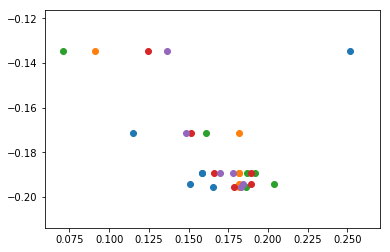

In [24]:
if __name__ == "__main__":
   
    input_data = load_data("data_carsmall.csv")
    training_data = input_data[0]
    to_be_predicted = normalize(input_data[1], norm = 'l1', axis = 0)
    
    # Estimate using linear model
    linear_model = linear_regression_model(training_data)
    linear_model_output = linear_model.predict(to_be_predicted)

    for point in range(len(to_be_predicted)):
        print(str(to_be_predicted[point]) + " : " + str(linear_model_output[point]) + "\n\n")
    
    print("Linear Model Statistics \n\nWeights : {} \nBias : {}".format(linear_model.coef_, linear_model.intercept_))
    
    # Plot Data
    plt.scatter(to_be_predicted[:,0], linear_model_output, label = "Feature 1")
    plt.scatter(to_be_predicted[:,1], linear_model_output, label = "Feature 2")
    plt.scatter(to_be_predicted[:,2], linear_model_output, label = "Feature 3")
    plt.scatter(to_be_predicted[:,3], linear_model_output, label = "Feature 4")
    plt.scatter(to_be_predicted[:,4], linear_model_output, label = "Feature 5")
    plt.show()